# <center>MACHINE LEARNING PROJECT: LUNG CANCER PREDICCTION</center>



## Context

My Machine Learning project focuses on predicting the degree of lung cancer a patient will develop based on a series of clinical data.
The reason for undertaking a project on this topic is because my father passed away several years ago from lung cancer, and I found it curious and interesting to explore the topic. Furthermore, since my previous studies are in biology, I feel qualified to interpret the data obtained with some confidence. I also have the advantage of understanding many of the terms used in medical studies.
With this project, I aim to demonstrate my knowledge as both a Data Scientist and a Biologist and thus be able to make my way into the world of bioinformatics and technology.

## Introduction to the Dataset

I obtained the dataset from the Kaggle website, which has the following URL: https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link.

This dataset contains information about lung cancer patients, including their age, sex, exposure to air pollution, alcohol consumption, dust allergies, occupational hazards, genetic risk, chronic lung disease, balanced diet, obesity, smoking, secondhand smoke, chest pain, coughing up blood, fatigue, weight loss, shortness of breath, wheezing, difficulty swallowing, nail clubbing, and snoring.

## Explanation of the Dataset Columns

* Age: The age of the patient. (Numeric)
* Gender: The gender of the patient. (Categorical)
* Air Pollution: The level of air pollution exposure of the patient. (Categorical)
* Alcohol use: The level of alcohol use of the patient. (Categorical)
* Dust Allergy: The level of dust allergy of the patient. (Categorical)
* OccuPational Hazards: The level of occupational hazards of the patient. (Categorical)
* Genetic Risk: The level of genetic risk of the patient. (Categorical)
* Chronic Lung Disease: The level of chronic lung disease of the patient. (Categorical)
* Balanced Diet: The level of balanced diet of the patient. (Categorical)
* Obesity: The level of obesity of the patient. (Categorical)
* Smoking: The level of smoking of the patient. (Categorical)
* Passive Smoker: The level of passive smoker of the patient. (Categorical)
* Chest Pain: The level of chest pain of the patient. (Categorical)
* Coughing of Blood: The level of coughing of blood of the patient. (Categorical)
* Fatigue: The level of fatigue of the patient. (Categorical)
* Weight Loss: The level of weight loss of the patient. (Categorical)
* Shortness of Breath: The level of shortness of breath of the patient. (Categorical)
* Wheezing: The level of wheezing of the patient. (Categorical)
* Swallowing Difficulty: The level of swallowing difficulty of the patient. (Categorical)
* Clubbing of Finger Nails: The level of clubbing of finger nails of the patient. (Categorical)



### Business Problem

In this case, the business problem is to predict the degree of "damage" or stage of lung cancer.

### Technical Problem

Therefore, we are faced with a classification problem. More specifically, a multiclass classification problem, since we have three categorization levels: "Low," "Medium," and "High."

## <center>Proyecto de Machine Learning</center> 


### First step: Import libraries that we are going to use

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from catboost import CatBoostClassifier
from collections import Counter
from lightgbm import LGBMClassifier
import pickle
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import mutual_info_classif, SelectFromModel, RFE, SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


### Step Two: Load Dataset

We'll take this opportunity to give it a first look.

In [2]:
df = pd.read_csv('/Users/lauragarcia/Projects/ML_Lung_Cancer_Prediction/src/data_sample/cancer patient data sets.csv')
df

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                       4             3                     2  ...        3   
1                       3             4                     2  ...        1   
2                       5             5                     4  ...        8   
3                       7             6                     7  ...        4   
4                       7             7                     6  ...        3   
..                    ...           ...                   ...  ...      ...   
995                     7             7                     6  ...        5   
996                     7             7                     6  ...        9   
997                     5             5                     4  ...        8   
998                     7             7                     6  ...        3   
999                     5             5                     4  ...        8   

     Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0              4                    2         2                      3   
1              3                    7         8                      6   
2              7                    9         2                      1   
3              2                    3         1                      4   
4              2                    4         1                      4   
..           ...                  ...       ...                    ...   
995            3                    2         7                      8   
996            6                    5         7                      2   
997            7                    9         2                      1   
998            2                    4         1                      4   
999            7                    9         2                      1   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                           1              2          3        4     Low  
1                           2              1          7        2  Medium  
2                           4              6          7        2    High  
3                           5              6          7        5    High  
4                           2              4          2        3    High  
..                        ...            ...        ...      ...     ...  
995                         2              4          5        3    High  
996                         4              3          1        4    High  
997                         4              6          7        2    High  
998                         2              4          2        3    High  
999                         4              6          7        2    High  

[1000 rows x 26 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [4]:
df.describe().T

count     mean         std   min     25%    50%  \
index                     1000.0  499.500  288.819436   0.0  249.75  499.5   
Age                       1000.0   37.174   12.005493  14.0   27.75   36.0   
Gender                    1000.0    1.402    0.490547   1.0    1.00    1.0   
Air Pollution             1000.0    3.840    2.030400   1.0    2.00    3.0   
Alcohol use               1000.0    4.563    2.620477   1.0    2.00    5.0   
Dust Allergy              1000.0    5.165    1.980833   1.0    4.00    6.0   
OccuPational Hazards      1000.0    4.840    2.107805   1.0    3.00    5.0   
Genetic Risk              1000.0    4.580    2.126999   1.0    2.00    5.0   
chronic Lung Disease      1000.0    4.380    1.848518   1.0    3.00    4.0   
Balanced Diet             1000.0    4.491    2.135528   1.0    2.00    4.0   
Obesity                   1000.0    4.465    2.124921   1.0    3.00    4.0   
Smoking                   1000.0    3.948    2.495902   1.0    2.00    3.0   
Passive Smoker            1000.0    4.195    2.311778   1.0    2.00    4.0   
Chest Pain                1000.0    4.438    2.280209   1.0    2.00    4.0   
Coughing of Blood         1000.0    4.859    2.427965   1.0    3.00    4.0   
Fatigue                   1000.0    3.856    2.244616   1.0    2.00    3.0   
Weight Loss               1000.0    3.855    2.206546   1.0    2.00    3.0   
Shortness of Breath       1000.0    4.240    2.285087   1.0    2.00    4.0   
Wheezing                  1000.0    3.777    2.041921   1.0    2.00    4.0   
Swallowing Difficulty     1000.0    3.746    2.270383   1.0    2.00    4.0   
Clubbing of Finger Nails  1000.0    3.923    2.388048   1.0    2.00    4.0   
Frequent Cold             1000.0    3.536    1.832502   1.0    2.00    3.0   
Dry Cough                 1000.0    3.853    2.039007   1.0    2.00    4.0   
Snoring                   1000.0    2.926    1.474686   1.0    2.00    3.0   

                             75%    max  
index                     749.25  999.0  
Age                        45.00   73.0  
Gender                      2.00    2.0  
Air Pollution               6.00    8.0  
Alcohol use                 7.00    8.0  
Dust Allergy                7.00    8.0  
OccuPational Hazards        7.00    8.0  
Genetic Risk                7.00    7.0  
chronic Lung Disease        6.00    7.0  
Balanced Diet               7.00    7.0  
Obesity                     7.00    7.0  
Smoking                     7.00    8.0  
Passive Smoker              7.00    8.0  
Chest Pain                  7.00    9.0  
Coughing of Blood           7.00    9.0  
Fatigue                     5.00    9.0  
Weight Loss                 6.00    8.0  
Shortness of Breath         6.00    9.0  
Wheezing                    5.00    8.0  
Swallowing Difficulty       5.00    8.0  
Clubbing of Finger Nails    5.00    9.0  
Frequent Cold               5.00    7.0  
Dry Cough                   6.00    7.0  
Snoring                     4.00    7.0

In [5]:
# It looks like our data is already scaled, except for age

In [6]:
# Checking for null values

df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

*Apparently there are no nulls and the data are already standardized, except for age.*
*I'm going to look for information in case there are scales to which this standardization refers.*
*After searching for data on all the variables, there is no categorization as such. In fact, most are categorized as mild, moderate, or severe.*
*Only for occupational risks have I found a categorization into 7 risks, but I don't think it makes much sense, since they are the type of risk and not a rating from low to high risk, which seems to be the trend for the rest of the variables.*
*Regarding obesity. There are four levels of obesity, along with overweight. If we add the other two categorizations made by the OMS, which are normal weight and underweight, we have seven. In this case, level 1 would be underweight, and level 7 would be extremely obese.*
*Regarding gender, I haven't found any information, but from other datasets and information I've read, it seems that level 1 is female and level 2 is male.*

### Step 3: Exploration and initial cleaning

In [7]:
# First of all, I'm going to eliminate the columns that are of no use to me, such as the index or the patient Id

df.drop('index', axis= 1, inplace= True)
df.drop('Patient Id', axis= 1, inplace= True )
df

Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0     33       1              2            4             5   
1     17       1              3            1             5   
2     35       1              4            5             6   
3     37       1              7            7             7   
4     46       1              6            8             7   
..   ...     ...            ...          ...           ...   
995   44       1              6            7             7   
996   37       2              6            8             7   
997   25       2              4            5             6   
998   18       2              6            8             7   
999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                       4             3                     2              2   
1                       3             4                     2              2   
2                       5             5                     4              6   
3                       7             6                     7              7   
4                       7             7                     6              7   
..                    ...           ...                   ...            ...   
995                     7             7                     6              7   
996                     7             7                     6              7   
997                     5             5                     4              6   
998                     7             7                     6              7   
999                     5             5                     4              6   

     Obesity  ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0          4  ...        3            4                    2         2   
1          2  ...        1            3                    7         8   
2          7  ...        8            7                    9         2   
3          7  ...        4            2                    3         1   
4          7  ...        3            2                    4         1   
..       ...  ...      ...          ...                  ...       ...   
995        7  ...        5            3                    2         7   
996        7  ...        9            6                    5         7   
997        7  ...        8            7                    9         2   
998        7  ...        3            2                    4         1   
999        7  ...        8            7                    9         2   

     Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  \
0                        3                         1              2   
1                        6                         2              1   
2                        1                         4              6   
3                        4                         5              6   
4                        4                         2              4   
..                     ...                       ...            ...   
995                      8                         2              4   
996                      2                         4              3   
997                      1                         4              6   
998                      4                         2              4   
999                      1                         4              6   

     Dry Cough  Snoring   Level  
0            3        4     Low  
1            7        2  Medium  
2            7        2    High  
3            7        5    High  
4            2        3    High  
..         ...      ...     ...  
995          5        3    High  
996          1        4    High  
997          7        2    High  
998          2        3    High  
999          7        2    High  

[1000 rows x 24 columns]

In [8]:
# With the preliminary information we have, all variables are of type int, except Level which is of type object.

In [9]:
# The business problem is trying to predict which level or stage of cancer each patient belongs to, given their clinical characteristics or symptoms.
# It is therefore a classification problem. In this case, it would be multiclass, since our target would be Level, and it has three values: Low, Medium, and High.

target = 'Level'

In [10]:
# I look at the target's value distribution

df[target].value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

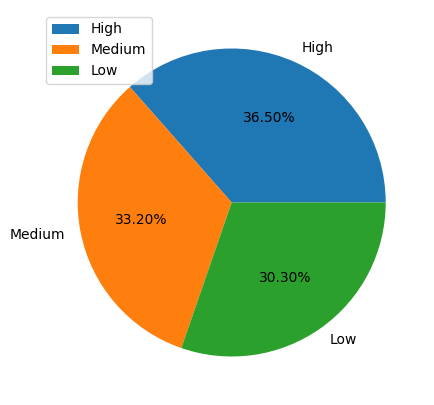

In [11]:
# I'm going to see graphically how the target variable is distributed

plt.figure(figsize=(15,5))
sizes = df[target].value_counts()
labels = sizes.index
plt.pie(sizes.values,labels=labels,autopct='%.2f%%')
plt.legend(["High", "Medium", "Low"])
plt.show()


*After the exploration, we can determine that we are facing a multiclass classification problem. Furthermore, it seems that our target is quite balanced, which is very positive when it comes to obtaining satisfactory results in our metrics and business models.*

### Step 4: Do Train/Test split

In [12]:
# I'm going to do the train/test split, I'll stratify with the target so that the 3 categories are evenly distributed

train_set, test_set = train_test_split( df, test_size = 20, stratify = df[target], random_state = 42)

In [13]:
# I'll check if they have been stratified similarly

train_set[target].value_counts()/len(train_set) *100

Level
High      36.530612
Medium    33.163265
Low       30.306122
Name: count, dtype: float64

In [14]:
test_set[target].value_counts()/len(test_set) *100

Level
Medium    35.0
High      35.0
Low       30.0
Name: count, dtype: float64

In [15]:
# The swings are similar

### Step 5: MiniEDA


Since our dataset is free of nulls or missing data and the values ​​of the categorical variables are already standardized, I don't see the need for anything else.

### Step 6: Features Selection/ Features Engineering

**_Visual Selection_**

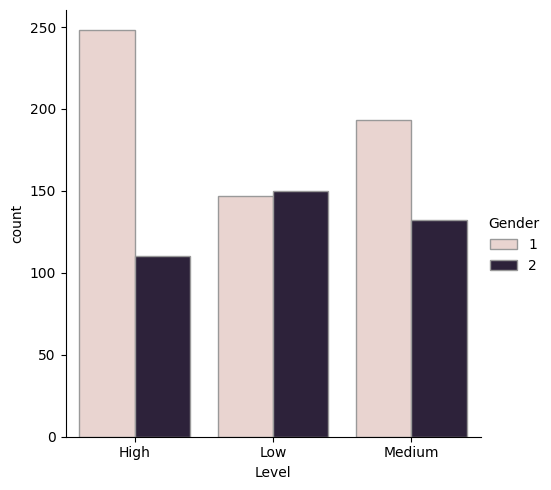

In [16]:
# I'm going to do a visual analysis of the possible features against the target to determine whether there's a relationship with it or not. I'm not going to use a pairplot because there are so many variables.
# So I'll do it individually (variable by variable against target).

# Target vs Gender
sns.catplot( x= "Level", 
            hue = "Gender",
            kind= "count", 
            edgecolor = ".6",
            orient = "v",
            data = train_set.sort_values("Level"));

In [17]:
# Except at the highest levels, it seems that gender is not a determining factor.

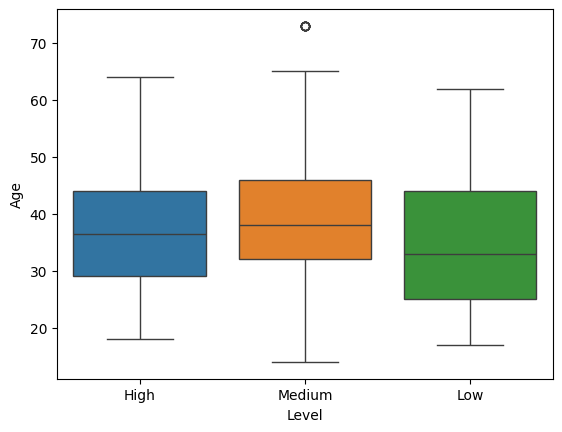

In [18]:
# Target vs Age
sns.boxplot(x = "Level",
            y = "Age",
            hue = "Level",
            data = train_set);

In [19]:
# Regarding age, the three graphs are similar. However, an outlier is visible in the average case; this data should be reviewed to determine if it is correct.
# Reviewing the statistics, the maximum age in the study is 73 years old, which corresponds to this outlier.

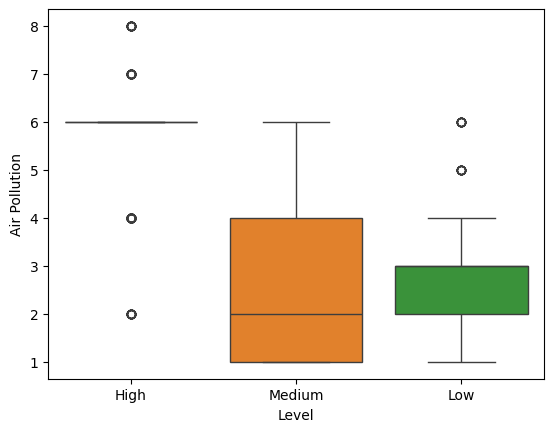

In [20]:
# Target vs Air Pollution
sns.boxplot(x = "Level",
            y = "Air Pollution",
            hue = "Level",
            data = train_set);

In [21]:
# In this case we already observe differences in relation to the three levels.

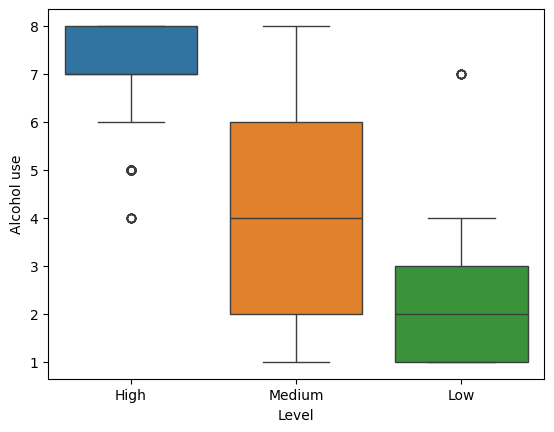

In [22]:
# Target vs Alcohol use
sns.boxplot(x = "Level",
            y = "Alcohol use",
            hue = "Level",
            data = train_set);

In [23]:
# In this variable we can see that it seems that, except for some outliers out there, the higher the alcohol consumption, the higher the level of "damage."

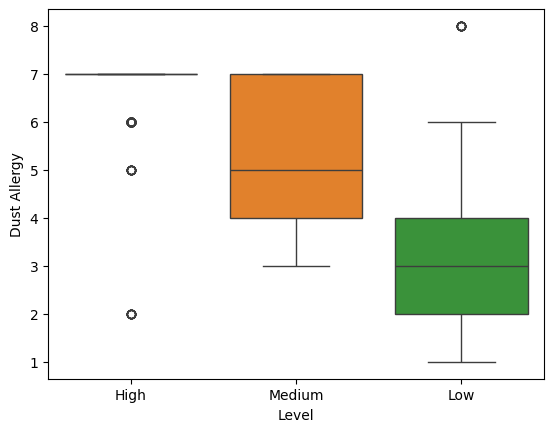

In [24]:
#Target vs Dust Allergy
sns.boxplot(x = "Level",
            y = "Dust Allergy",
            hue = "Level",
            data = train_set);

In [25]:
# There is also apparently a relationship: the higher the level of dust allergy, the more "damage."

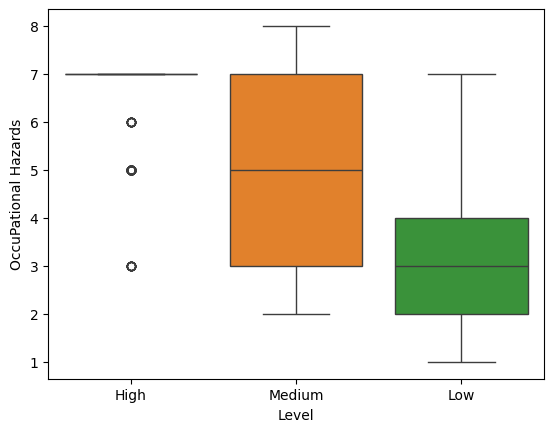

In [26]:
# Target vs Occupational Hazards
sns.boxplot(x = "Level",
            y = "OccuPational Hazards",
            hue = "Level",
            data = train_set);

In [27]:
# Similar distribution to the previous one.

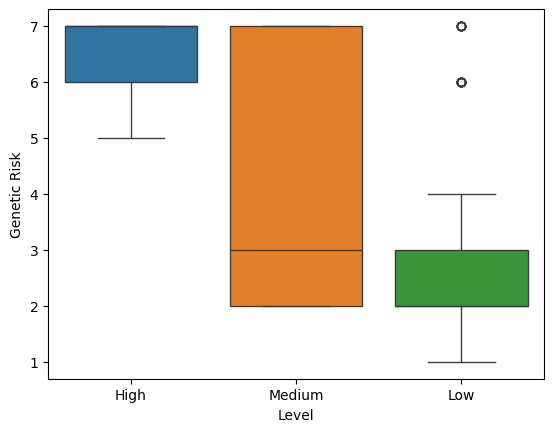

In [28]:
# Target vs Genetic risk
sns.boxplot(x = "Level",
            y = "Genetic Risk",
            hue = "Level",
            data = train_set);

In [29]:
# There appears to be a relationship, although the "average damage" affects both low-risk and high-risk genetic individuals.

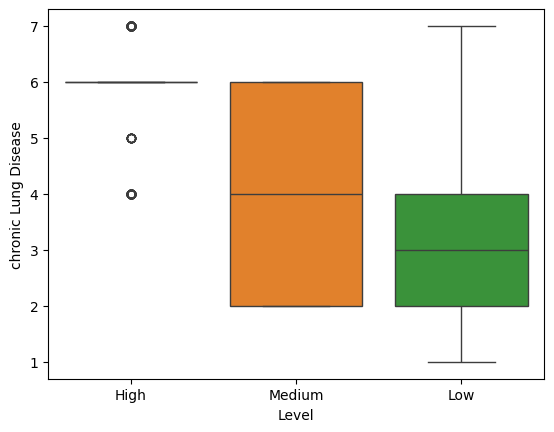

In [30]:
# Target vs Chronic Lung Disease
sns.boxplot(x = "Level",
            y = "chronic Lung Disease",
            hue = "Level",
            data = train_set);

In [31]:
# They may apparently be a relationship.

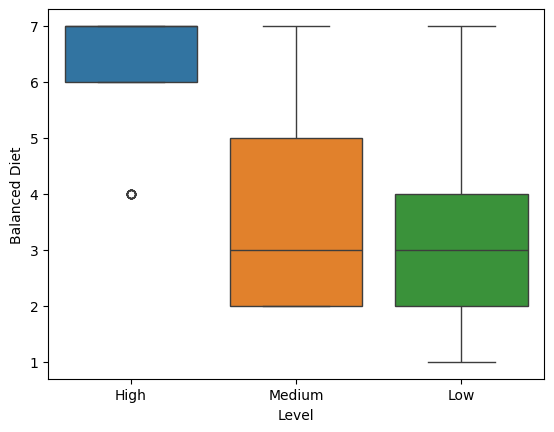

In [32]:
# Target vs Balanced Diet
sns.boxplot(x = "Level",
            y = "Balanced Diet",
            hue = "Level",
            data = train_set);

In [33]:
# At first glance, it seems that diet also influences a greater or lesser degree of "damage," although there are all kinds.

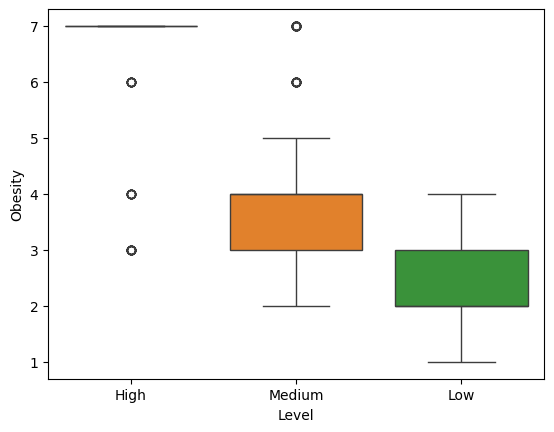

In [34]:
# Target vs Obesity 
sns.boxplot(x = "Level",
            y = "Obesity",
            hue = "Level",
            data = train_set);

In [35]:
# It seems to be a certain relasionship.

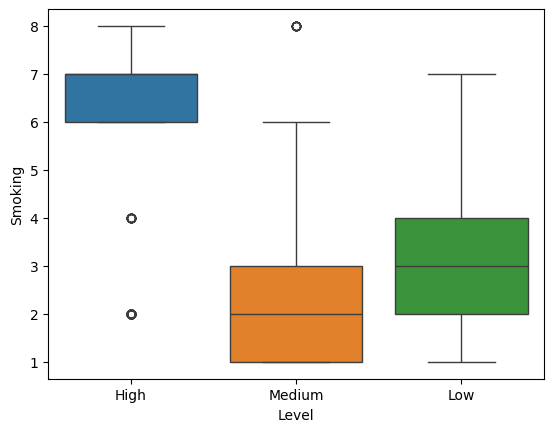

In [36]:
# Target vs Smoking
sns.boxplot(x = "Level",
            y = "Smoking",
            hue = "Level",
            data = train_set);

In [37]:
# This graph is more uneven. It seems that when the damage is high, there is a relationship with the level of smoking, but at medium and low levels, it doesn't affect it as much (interesting).

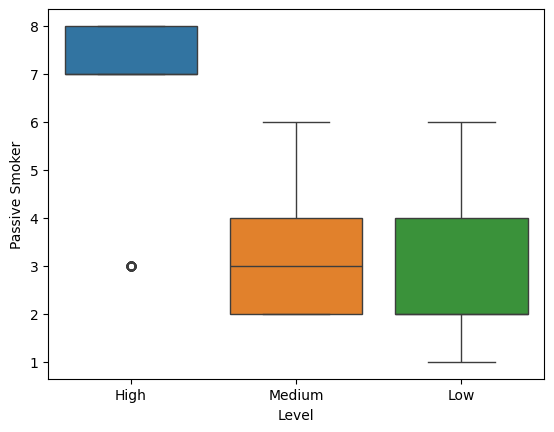

In [38]:
# Target vs Passive Smoker
sns.boxplot(x = "Level",
            y = "Passive Smoker",
            hue = "Level",
            data = train_set);

In [39]:
# Here, the distribution is also interesting: for highly exposed passive smokers, the damage appears to be higher. In the case of light or medium passive smokers, the damage is similar for both of them.

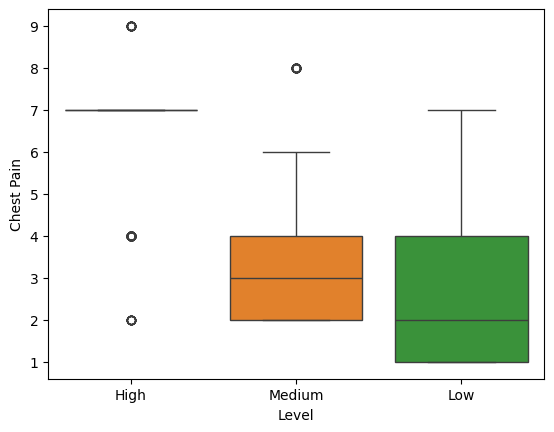

In [40]:
# Target vs Chest Pain
sns.boxplot(x = "Level",
            y = "Chest Pain",
            hue = "Level",
            data = train_set);

In [41]:
# Similar to the previously.

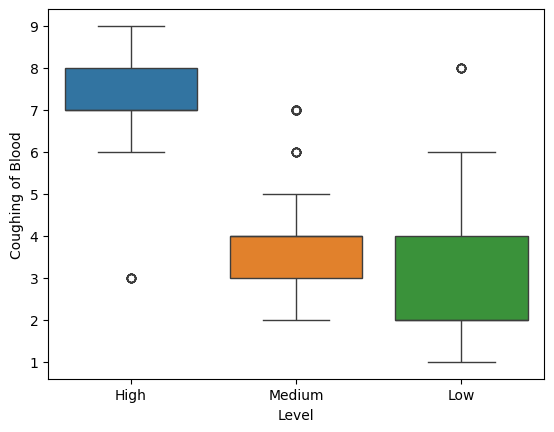

In [42]:
# Target vs Coughing of Blood
sns.boxplot(x = "Level",
            y = "Coughing of Blood",
            hue = "Level",
            data = train_set);

In [43]:
# In this variable it does seem to have more relationship with the target.

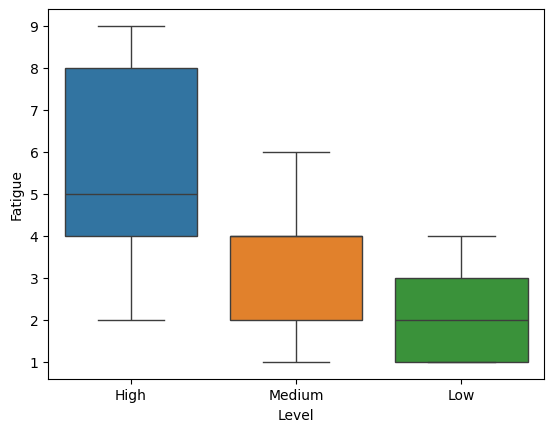

In [44]:
# Target vs Fatigue
sns.boxplot(x = "Level",
            y = "Fatigue",
            hue = "Level",
            data = train_set);

In [45]:
# Fatigue does seem to have a direct relationship with the severity of the damage. The greater damage, the greater fatigue.

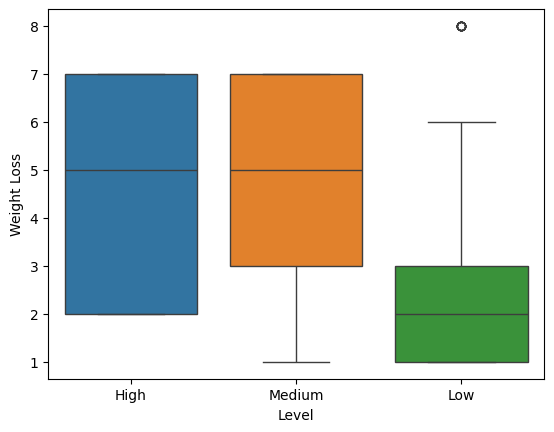

In [46]:
# Target vs Weight Loos
sns.boxplot(x = "Level",
            y = "Weight Loss",
            hue = "Level",
            data = train_set);

In [47]:
# They don't seem to have much of a relationship, at least not directly.

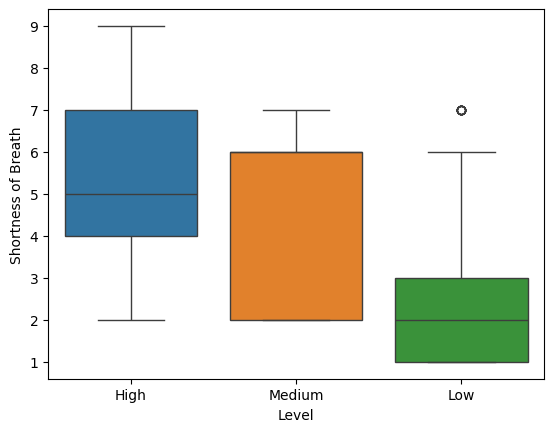

In [48]:
# Target vs Shortness of Breathe
sns.boxplot(x = "Level",
            y = "Shortness of Breath",
            hue = "Level",
            data = train_set);

In [49]:
# La disnea o dificultad respiratoria sí que tiene relación directa con el grado de daño.

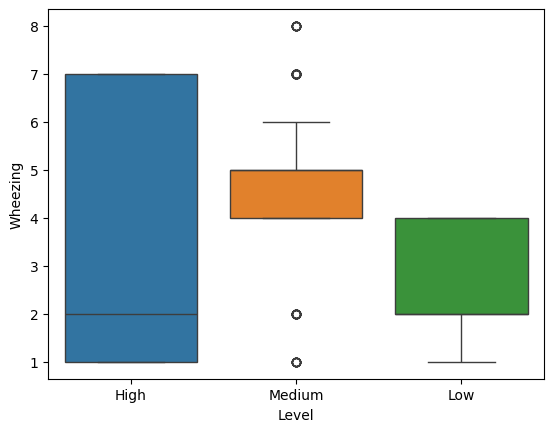

In [50]:
# Target vs Wheezing
sns.boxplot(x = "Level",
            y = "Wheezing",
            hue = "Level",
            data = train_set);

In [51]:
# Wheezing (which is often associated with asthma) does not seem to have much of a relationship with the degree of damage in this cancer.

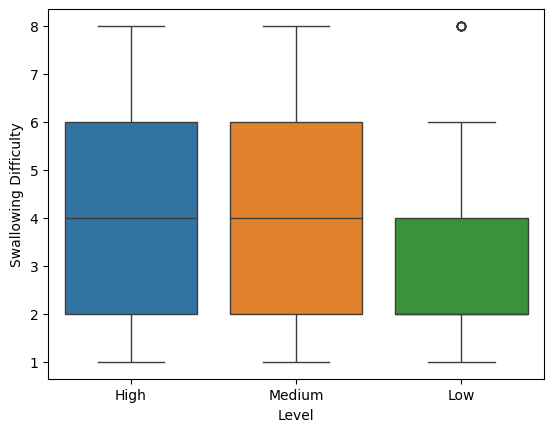

In [52]:
# Target vs Swallowing Difficulty
sns.boxplot(x = "Level",
            y = "Swallowing Difficulty",
            hue = "Level",
            data = train_set);

In [53]:
# I don't see a relationship here either. All degrees of damage are similarly affected by dysphagia.

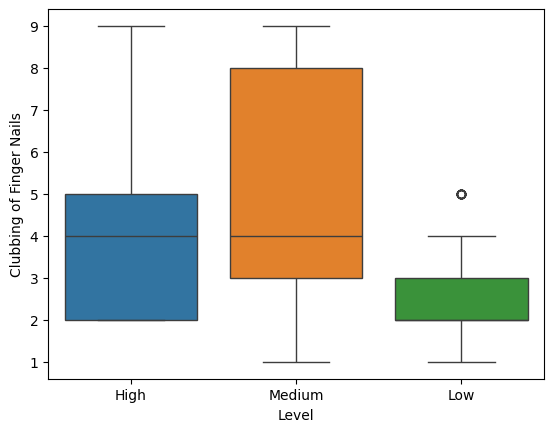

In [54]:
# Target vs Clubbing of Finger Nails
sns.boxplot(x = "Level",
            y = "Clubbing of Finger Nails",
            hue = "Level",
            data = train_set);

In [55]:
# Clubbing of the fingers (which can apparently be a diagnostic sign in lung or heart diseases, among others) doesn't seem to have a direct relationship in this case.
# It seems to affect moderate-damage cases somewhat more, but low- and high-damage cases also have it.

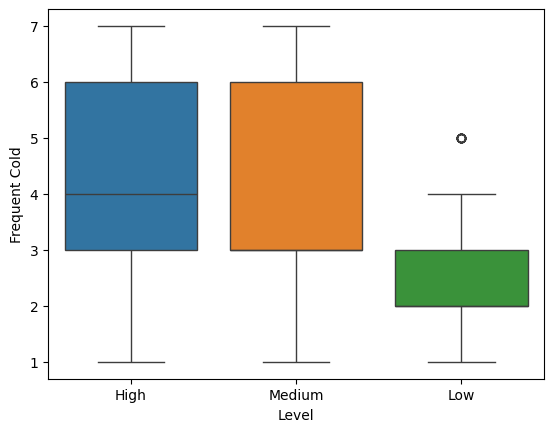

In [56]:
# Target vs Frequent Cold
sns.boxplot(x = "Level",
            y = "Frequent Cold",
            hue = "Level",
            data = train_set);

In [57]:
# In this variable, the frequency of suffering from colds apparently does not have a very direct relationship with the degree of cancer damage.

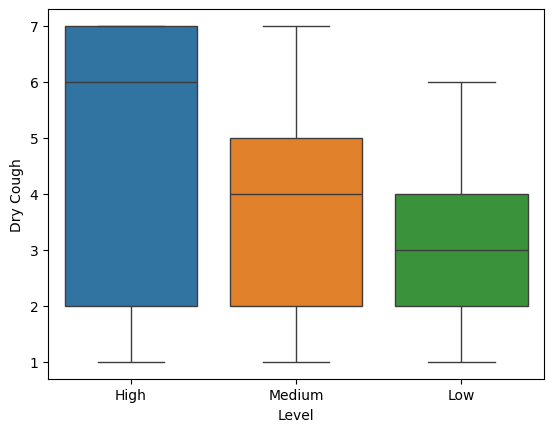

In [58]:
# Target vs Dry Cough
sns.boxplot(x = "Level",
            y = "Dry Cough",
            hue = "Level",
            data = train_set);

In [59]:
# As for dry cough, there does seem to be a relationship with the severity of the damage, although it may be mild.

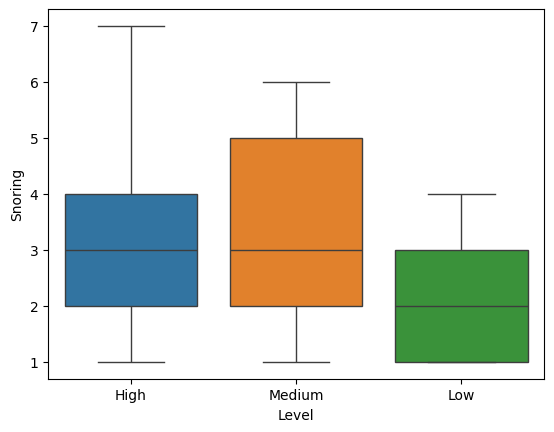

In [60]:
# Target vs Snoring
sns.boxplot(x = "Level",
            y = "Snoring",
            hue = "Level",
            data = train_set);

In [61]:
# In relation to snoring, a slight relationship could be intuited, but it is not entirely clear to me.

*Because the visual analysis of all the variables against the target, in some cases, does not make this possible relationship clear, I will perform mathematical analysis to be able to see this possible relationship with numerical data.*

**_Stadistic Selection_**

*Our variables are categorical, even though their dtype is int. They could be treated as numeric variables. Based on the data we have and their presentation, I could infer that they are continuous numeric variables.*
*However, I'm going to treat them as categorical variables without further ado, since I don't consider "grade 2" to be twice as "harmful" or twice as relevant as "grade 1."*
*Therefore, I'm going to run a Chi-square test on our target to see the possible relationship between categorical variables and target variables.*

In [62]:
# First I create a list with the categorical variables.

features_cat = train_set.columns.to_list()
features_cat.remove(target) # remove target
features_cat.remove('Age') # remove the only numerical variable
features_cat

['Gender',
 'Air Pollution',
 'Alcohol use',
 'Dust Allergy',
 'OccuPational Hazards',
 'Genetic Risk',
 'chronic Lung Disease',
 'Balanced Diet',
 'Obesity',
 'Smoking',
 'Passive Smoker',
 'Chest Pain',
 'Coughing of Blood',
 'Fatigue',
 'Weight Loss',
 'Shortness of Breath',
 'Wheezing',
 'Swallowing Difficulty',
 'Clubbing of Finger Nails',
 'Frequent Cold',
 'Dry Cough',
 'Snoring']

In [63]:
# Numerical variable

feature_num = train_set['Age']

In [64]:
# Now I run the chi-square test for the categorical variables and see what correlation they have.

target_col = train_set[target] # assign our target
p_value = 0.05 # assign the p_value to accept or reject the null hypothesis
features_chi = [] # empty list where I will add the features that are related to my target
p_value_list = [] # empty list where I will add the p_values ​​of those features that are related to my target
for col in train_set[features_cat].columns:
            tab = pd.crosstab (train_set[col], target_col) 
            test_result = chi2_contingency(tab)
            if test_result[1] < p_value:
                features_chi.append(col)
                p_value_list.append(test_result[1])

In [65]:
# I already have saved the features related to the target and their p_value (categorical features).

In [66]:
# We do an ANOVA test for age

level_cat = train_set[target].unique()  # Get the unique values ​​from the categorical column,
age_for_level = [train_set[train_set[target] == categoric]['Age'] for categoric in level_cat] # Get the age for each damage level and include them in a list

In [67]:
f_val, p_val = stats.f_oneway(*age_for_level) 
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 6.111818745192272
Valor p: 0.0023021749243392767


In [68]:
# We add age to our list, since p_val is < than p_value and we make a dataframe

features_chi.append('Age')
p_value_list.append(p_val)
stadistic_df = pd.DataFrame( {'Features': features_chi, 'p_value': p_value_list})
stadistic_df = stadistic_df.sort_values(by='p_value').reset_index(drop=True) # I order the features from highest to lowest importance
stadistic_df

Features        p_value
0          Coughing of Blood  3.811491e-206
1                    Obesity  1.043678e-196
2             Passive Smoker  6.402755e-195
3                   Wheezing  2.551694e-176
4                 Chest Pain  3.808708e-173
5                Alcohol use  4.148720e-173
6        Shortness of Breath  4.408441e-163
7              Balanced Diet  4.102820e-156
8               Dust Allergy  1.436697e-143
9       OccuPational Hazards  6.009067e-137
10                   Smoking  1.458214e-134
11                   Fatigue  2.310933e-130
12             Air Pollution  3.487271e-129
13              Genetic Risk  1.958855e-124
14      chronic Lung Disease  3.991984e-114
15             Frequent Cold   3.397731e-91
16  Clubbing of Finger Nails   2.306454e-86
17                 Dry Cough   1.251395e-78
18               Weight Loss   1.191414e-67
19     Swallowing Difficulty   1.059162e-44
20                   Snoring   8.841331e-34
21                    Gender   1.728489e-06
22                       Age   2.302175e-03

In [69]:
# According to chi-square test and ANOVA, it seems that all the variables have some relationship with the target.
# I'm going to make a list.

features_stad = stadistic_df['Features'].to_list()
features_stad

['Coughing of Blood',
 'Obesity',
 'Passive Smoker',
 'Wheezing',
 'Chest Pain',
 'Alcohol use',
 'Shortness of Breath',
 'Balanced Diet',
 'Dust Allergy',
 'OccuPational Hazards',
 'Smoking',
 'Fatigue',
 'Air Pollution',
 'Genetic Risk',
 'chronic Lung Disease',
 'Frequent Cold',
 'Clubbing of Finger Nails',
 'Dry Cough',
 'Weight Loss',
 'Swallowing Difficulty',
 'Snoring',
 'Gender',
 'Age']

In [70]:
# So, after statistical analysis, I'll go through all the features first. I'll see what the rest of the selection possibilities yield.

**_Mutual Information Selection_**

In [71]:
# We do mutual information classification to see all the relationships

features_list = train_set.columns.to_list()
features_list.remove(target) # remove target
mi = mutual_info_classif(train_set[features_list], train_set[target]) # value obtained by mutual information
mi_df = pd.DataFrame({'Feature': train_set[features_list].columns, 'Mutual Information': mi}) # make a dataframe with the results of mutual information
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True) # I order the features from highest to lowest importance
mi_df


Feature  Mutual Information
0             Passive Smoker            0.623770
1          Coughing of Blood            0.607816
2                Alcohol use            0.547548
3                    Obesity            0.542815
4                   Wheezing            0.532270
5                 Chest Pain            0.522566
6              Balanced Diet            0.474964
7               Dust Allergy            0.444712
8        Shortness of Breath            0.430779
9               Genetic Risk            0.417666
10      OccuPational Hazards            0.402717
11                   Smoking            0.401330
12             Air Pollution            0.393959
13                   Fatigue            0.376459
14                       Age            0.357674
15      chronic Lung Disease            0.342846
16  Clubbing of Finger Nails            0.282527
17             Frequent Cold            0.261374
18                 Dry Cough            0.249279
19               Weight Loss            0.208998
20                   Snoring            0.127444
21     Swallowing Difficulty            0.108209
22                    Gender            0.030266

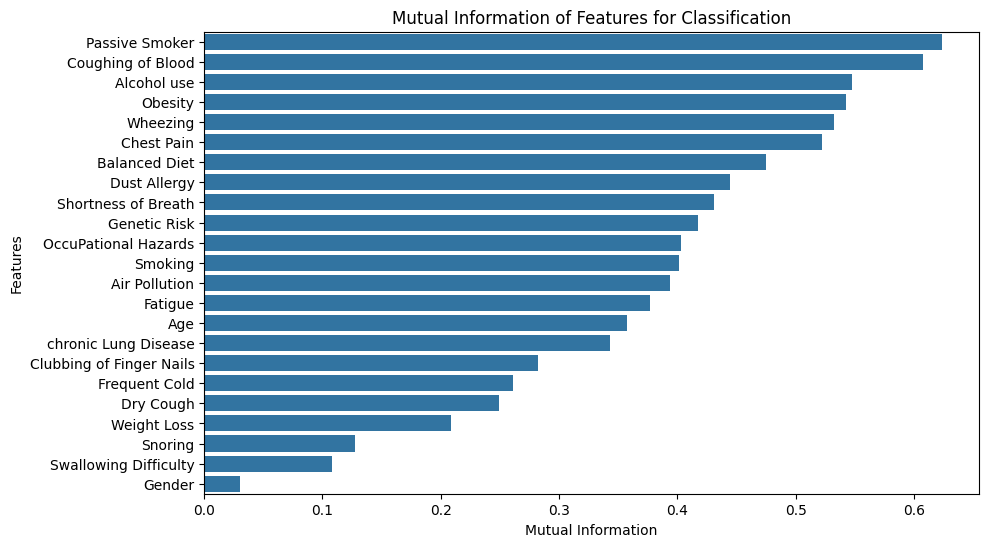

In [72]:
# Graphically

plt.figure(figsize=(10,6))
sns.barplot(x='Mutual Information',y='Feature', data=mi_df)
plt.title('Mutual Information of Features for Classification')
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.show()

In [73]:
# According to mutual information, the only variable that is not related is gender. Although a limit can be set for values ​​< 0.1
# I'm going to create a list of the variables selected by mutual information.

condition = mi_df['Mutual Information'] > 0.1
features_mi = mi_df.loc[condition, 'Feature'].to_list()
features_mi

['Passive Smoker',
 'Coughing of Blood',
 'Alcohol use',
 'Obesity',
 'Wheezing',
 'Chest Pain',
 'Balanced Diet',
 'Dust Allergy',
 'Shortness of Breath',
 'Genetic Risk',
 'OccuPational Hazards',
 'Smoking',
 'Air Pollution',
 'Fatigue',
 'Age',
 'chronic Lung Disease',
 'Clubbing of Finger Nails',
 'Frequent Cold',
 'Dry Cough',
 'Weight Loss',
 'Snoring',
 'Swallowing Difficulty']

**_Selection by model_**

In [74]:
# I'm going to use model-based feature selection. I'll use Random Forest automatically for that, and then I'll see if I get the same features if I do it manually.

rf_selector = RandomForestClassifier(random_state= 42, class_weight= "balanced") 

selector_model = SelectFromModel(estimator = rf_selector, threshold="median") # Use median

selector_model.fit(train_set[features_list], train_set[target]) 
features_model = list(selector_model.get_feature_names_out())
features_model

['Alcohol use',
 'Dust Allergy',
 'Balanced Diet',
 'Obesity',
 'Smoking',
 'Passive Smoker',
 'Chest Pain',
 'Coughing of Blood',
 'Fatigue',
 'Wheezing',
 'Swallowing Difficulty',
 'Clubbing of Finger Nails']

In [75]:
# Manually
rf_check = RandomForestClassifier(random_state= 42, class_weight= "balanced")

rf_check.fit(train_set[features_list], train_set[target])

df_importance= pd.DataFrame(rf_check.feature_importances_, columns = ["importance"], index = features_list).sort_values("importance",ascending = False)
df_importance

importance
Coughing of Blood           0.099784
Obesity                     0.098918
Wheezing                    0.094752
Passive Smoker              0.078466
Chest Pain                  0.052965
Fatigue                     0.051520
Balanced Diet               0.045328
Alcohol use                 0.044283
Swallowing Difficulty       0.044089
Smoking                     0.043334
Dust Allergy                0.041295
Clubbing of Finger Nails    0.038880
OccuPational Hazards        0.038780
Shortness of Breath         0.036123
Snoring                     0.034247
Air Pollution               0.033057
Genetic Risk                0.032036
Frequent Cold               0.031338
Weight Loss                 0.026486
chronic Lung Disease        0.015084
Dry Cough                   0.013800
Age                         0.005286
Gender                      0.000148

In [76]:
# Use de median

df_importance.importance.median()

np.float64(0.03888029181211212)

In [77]:
df_importance[df_importance.importance > df_importance.importance.median()]

importance
Coughing of Blood        0.099784
Obesity                  0.098918
Wheezing                 0.094752
Passive Smoker           0.078466
Chest Pain               0.052965
Fatigue                  0.051520
Balanced Diet            0.045328
Alcohol use              0.044283
Swallowing Difficulty    0.044089
Smoking                  0.043334
Dust Allergy             0.041295

In [78]:
# We make a list of manual model features

features_manual = df_importance[df_importance.importance > df_importance.importance.median()].index.to_list()
features_manual 

['Coughing of Blood',
 'Obesity',
 'Wheezing',
 'Passive Smoker',
 'Chest Pain',
 'Fatigue',
 'Balanced Diet',
 'Alcohol use',
 'Swallowing Difficulty',
 'Smoking',
 'Dust Allergy']

In [79]:
# It seems that even though we select by model, I have two lists with different features, or at least with different weights.

**_RFE Selection_**

In [80]:
# I'm going to try RFE, I'll select 12 features, which is half of what I have and it already seems like a good reduction to me.

rf_RFE = RandomForestClassifier(random_state= 42, class_weight= "balanced")
rfe = RFE (estimator = rf_RFE, n_features_to_select= 12, step = 1) # Iterate until you have 12

rfe.fit(train_set[features_list], train_set[target]) # fit

RFE(estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    n_features_to_select=12)

In [81]:
# I get the list with the names of the selected features.

features_RFE = list(rfe.get_feature_names_out())
features_RFE

['Air Pollution',
 'Alcohol use',
 'Dust Allergy',
 'Balanced Diet',
 'Obesity',
 'Smoking',
 'Passive Smoker',
 'Coughing of Blood',
 'Fatigue',
 'Wheezing',
 'Clubbing of Finger Nails',
 'Snoring']

**_Selección SFS_**

In [82]:
# Now I'm going to try SFS, I'll also choose 12 feature, for the same reason as before.

rf_SFS = RandomForestClassifier(class_weight= "balanced", random_state = 42)
sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 12, # number of features to choose
                                        cv = 4,
                                        scoring = "balanced_accuracy", 
                                        n_jobs = -1)

sfs_forward.fit(train_set[features_list], train_set[target]) # fit

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(class_weight='balanced',
                                                           random_state=42),
                          n_features_to_select=12, n_jobs=-1,
                          scoring='balanced_accuracy')

In [83]:
# Obtaining the list of features by SFS.

features_SFS = list(sfs_forward.get_feature_names_out())
features_SFS

['Age',
 'Gender',
 'Air Pollution',
 'Alcohol use',
 'Dust Allergy',
 'OccuPational Hazards',
 'Genetic Risk',
 'chronic Lung Disease',
 'Balanced Diet',
 'Obesity',
 'Coughing of Blood',
 'Wheezing']

In [84]:
# Curious, since age is discarded in most feature selection, as is gender, which apparently has less weight.

**_Selection by Hard-Voting_**

In [85]:
# Finally, I'm going to do a hard-voting, choosing the 12 most voted features, to reduce the selected features by half, let's see what comes out.

complete_list = features_stad + features_mi + features_manual + features_model + features_RFE + features_SFS
votations = Counter(complete_list)
votations

Counter({'Coughing of Blood': 6,
         'Obesity': 6,
         'Wheezing': 6,
         'Alcohol use': 6,
         'Balanced Diet': 6,
         'Dust Allergy': 6,
         'Passive Smoker': 5,
         'Smoking': 5,
         'Fatigue': 5,
         'Chest Pain': 4,
         'Air Pollution': 4,
         'Clubbing of Finger Nails': 4,
         'Swallowing Difficulty': 4,
         'OccuPational Hazards': 3,
         'Genetic Risk': 3,
         'chronic Lung Disease': 3,
         'Snoring': 3,
         'Age': 3,
         'Shortness of Breath': 2,
         'Frequent Cold': 2,
         'Dry Cough': 2,
         'Weight Loss': 2,
         'Gender': 2})

In [86]:
# Hard-voting winners

winner = pd.DataFrame(votations.values(), columns = ['Vote'], index = votations.keys()).sort_values('Vote', ascending = False)
winner

Vote
Coughing of Blood            6
Obesity                      6
Wheezing                     6
Alcohol use                  6
Balanced Diet                6
Dust Allergy                 6
Passive Smoker               5
Smoking                      5
Fatigue                      5
Air Pollution                4
Chest Pain                   4
Swallowing Difficulty        4
Clubbing of Finger Nails     4
chronic Lung Disease         3
OccuPational Hazards         3
Snoring                      3
Genetic Risk                 3
Age                          3
Shortness of Breath          2
Weight Loss                  2
Dry Cough                    2
Frequent Cold                2
Gender                       2

In [87]:
# Listado de features por hard-voting.

features_hard_voting = winner['Vote'].nlargest(12).index.to_list()
features_hard_voting

['Coughing of Blood',
 'Obesity',
 'Wheezing',
 'Alcohol use',
 'Balanced Diet',
 'Dust Allergy',
 'Passive Smoker',
 'Smoking',
 'Fatigue',
 'Air Pollution',
 'Chest Pain',
 'Swallowing Difficulty']

## Step 7: Baseline Models and Cross validation

In [88]:
# I'm going to do the corresponding splits before modeling.

X_train = train_set[features_list]
y_train = train_set[target]

X_test = test_set[features_list]
y_test = test_set [target]


In [89]:
# Note, for linear regression and SVC we need to scale the variables.

scaler = StandardScaler()
scaler.fit(train_set[features_list]) # We adapt the StandardScaler to the Train, but then we use the same one in the test (because the mean and deviation are already those of the train).
X_train_scal = pd.DataFrame(scaler.transform(train_set[features_list]), columns = features_list)
X_test_scal = pd.DataFrame(scaler.transform(test_set[features_list]), columns= features_list)
X_train_scal.describe()

Age        Gender  Air Pollution   Alcohol use  Dust Allergy  \
count  9.800000e+02  9.800000e+02   9.800000e+02  9.800000e+02  9.800000e+02   
mean   8.247371e-17  1.749168e-16   1.232574e-16  3.443957e-17 -1.622285e-16   
std    1.000511e+00  1.000511e+00   1.000511e+00  1.000511e+00  1.000511e+00   
min   -1.933838e+00 -8.164966e-01  -1.399085e+00 -1.362645e+00 -2.121869e+00   
25%   -7.862922e-01 -8.164966e-01  -9.071209e-01 -9.812133e-01 -5.988477e-01   
50%   -9.776492e-02 -8.164966e-01  -4.151571e-01  1.630815e-01  4.164996e-01   
75%    6.533558e-01  1.224745e+00   1.060734e+00  9.259446e-01  9.241732e-01   
max    2.990176e+00  1.224745e+00   2.044661e+00  1.307376e+00  1.431847e+00   

       OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count          9.800000e+02  9.800000e+02          9.800000e+02   
mean           5.165936e-17 -1.123818e-16         -3.081435e-17   
std            1.000511e+00  1.000511e+00          1.000511e+00   
min           -1.828445e+00 -1.690121e+00         -1.829155e+00   
25%           -8.791068e-01 -7.484958e-01         -7.476637e-01   
50%            7.023167e-02  1.931292e-01         -2.069180e-01   
75%            1.019570e+00  1.134754e+00          8.745734e-01   
max            1.494239e+00  1.134754e+00          1.415319e+00   

       Balanced Diet       Obesity  ...  Coughing of Blood       Fatigue  \
count   9.800000e+02  9.800000e+02  ...       9.800000e+02  9.800000e+02   
mean    9.788089e-17 -2.447022e-17  ...       1.450087e-17  1.232574e-16   
std     1.000511e+00  1.000511e+00  ...       1.000511e+00  1.000511e+00   
min    -1.637301e+00 -1.637426e+00  ...      -1.581522e+00 -1.271010e+00   
25%    -1.169228e+00 -6.937754e-01  ...      -7.606051e-01 -8.247220e-01   
50%    -2.330814e-01 -2.219504e-01  ...      -3.501464e-01 -3.784340e-01   
75%     1.171138e+00  1.193525e+00  ...       8.812297e-01  5.141420e-01   
max     1.171138e+00  1.193525e+00  ...       1.702147e+00  2.299294e+00   

        Weight Loss  Shortness of Breath      Wheezing  Swallowing Difficulty  \
count  9.800000e+02         9.800000e+02  9.800000e+02           9.800000e+02   
mean  -9.063045e-18        -1.087565e-16 -5.800349e-17          -5.437827e-18   
std    1.000511e+00         1.000511e+00  1.000511e+00           1.000511e+00   
min   -1.289456e+00        -1.423090e+00 -1.359062e+00          -1.203532e+00   
25%   -8.363661e-01        -9.845278e-01 -8.688595e-01          -7.629412e-01   
50%   -3.832767e-01        -1.074030e-01  1.115461e-01           1.182402e-01   
75%    9.759917e-01         7.697217e-01  6.017489e-01           5.588309e-01   
max    1.882171e+00         2.085409e+00  2.072357e+00           1.880603e+00   

       Clubbing of Finger Nails  Frequent Cold     Dry Cough       Snoring  
count              9.800000e+02   9.800000e+02  9.800000e+02  9.800000e+02  
mean              -1.993870e-17  -1.468213e-16  5.687061e-17 -4.440892e-17  
std                1.000511e+00   1.000511e+00  1.000511e+00  1.000511e+00  
min               -1.227275e+00  -1.383836e+00 -1.396984e+00 -1.306084e+00  
25%               -8.083515e-01  -8.378779e-01 -9.076898e-01 -6.295713e-01  
50%                2.949564e-02  -2.919202e-01  7.089766e-02  4.694172e-02  
75%                4.484192e-01   7.999952e-01  1.049485e+00  7.234547e-01  
max                2.124114e+00   1.891911e+00  1.538779e+00  2.752994e+00  

[8 rows x 23 columns]

In [90]:
# Let's start with general modeling.
# Here I'm going to ignore linear regression and SVC for scaling reasons. I'll follow a similar process with these two models later.

names = [f"Selection {name}" for name in ["stadistic", "mutual information", "manual", "model", "rfe", "sfs", "voting"]]
model_names = ["Random Forest", "KNN", " Decission Tree", "AdaBoost", "LightGBM", "Catboost"]

# We instantiate the different classification models that I am going to use.

rf_clf = RandomForestClassifier(class_weight= "balanced", random_state= 42)
knn_clf = KNeighborsClassifier(weights= "uniform", n_jobs= -1)
dt_clf = DecisionTreeClassifier(class_weight = "balanced", random_state = 42) 
ada_clf = AdaBoostClassifier(random_state = 42)
lgb_clf = LGBMClassifier(class_weight= "balanced", random_state = 42, verbose = -100, n_jobs= -1)
cb_clf = CatBoostClassifier(random_state = 42)


models = [rf_clf, knn_clf, dt_clf, ada_clf, lgb_clf, cb_clf] # models list
results = [] # List where we will store the metric results of each model with each group of features used.

# We do cross-validation testing

for index, checklist in enumerate([features_stad, features_mi, features_manual, features_model, features_RFE, features_SFS, features_hard_voting]): # we pass the set of each list of selected features
    X_train_models = train_set[checklist]
    y_train_models = y_train
    
    for model_name, model in zip(model_names, models):
        metric = np.mean(cross_val_score(model, X_train_models, y_train_models, cv = 5, scoring = "balanced_accuracy")) # we obtain the cross-validation metric
        data = {
            "features_list": names[index],
            "model": model_name,
            "avg. recall": metric
        }
        print(data)
        results.append(data.copy())
df_results = pd.DataFrame(results) # I pass the results to a data frame
df_results.sort_values("avg. recall", ascending = False) # we order from best to worst metric

{'features_list': 'Selection stadistic', 'model': 'Random Forest', 'avg. recall': np.float64(1.0)}
{'features_list': 'Selection stadistic', 'model': 'KNN', 'avg. recall': np.float64(0.9977401129943504)}
{'features_list': 'Selection stadistic', 'model': ' Decission Tree', 'avg. recall': np.float64(1.0)}
{'features_list': 'Selection stadistic', 'model': 'AdaBoost', 'avg. recall': np.float64(0.9611806460959003)}
{'features_list': 'Selection stadistic', 'model': 'LightGBM', 'avg. recall': np.float64(1.0)}
Learning rate set to 0.078151
0:	learn: 0.9815316	total: 57.9ms	remaining: 57.8s
1:	learn: 0.8853657	total: 58.7ms	remaining: 29.3s
2:	learn: 0.8033016	total: 59.4ms	remaining: 19.7s
3:	learn: 0.7306817	total: 60.2ms	remaining: 15s
4:	learn: 0.6681246	total: 61ms	remaining: 12.1s
5:	learn: 0.6170800	total: 61.8ms	remaining: 10.2s
6:	learn: 0.5664905	total: 62.6ms	remaining: 8.88s
7:	learn: 0.5264849	total: 63.5ms	remaining: 7.88s
8:	learn: 0.4901864	total: 64.3ms	remaining: 7.08s
9:	learn

features_list            model  avg. recall
0            Selection stadistic    Random Forest     1.000000
2            Selection stadistic   Decission Tree     1.000000
8   Selection mutual information   Decission Tree     1.000000
4            Selection stadistic         LightGBM     1.000000
5            Selection stadistic         Catboost     1.000000
6   Selection mutual information    Random Forest     1.000000
13              Selection manual              KNN     1.000000
12              Selection manual    Random Forest     1.000000
11  Selection mutual information         Catboost     1.000000
10  Selection mutual information         LightGBM     1.000000
41              Selection voting         Catboost     1.000000
40              Selection voting         LightGBM     1.000000
29                 Selection rfe         Catboost     1.000000
30                 Selection sfs    Random Forest     1.000000
14              Selection manual   Decission Tree     1.000000
16              Selection manual         LightGBM     1.000000
17              Selection manual         Catboost     1.000000
18               Selection model    Random Forest     1.000000
24                 Selection rfe    Random Forest     1.000000
19               Selection model              KNN     1.000000
20               Selection model   Decission Tree     1.000000
22               Selection model         LightGBM     1.000000
25                 Selection rfe              KNN     1.000000
23               Selection model         Catboost     1.000000
28                 Selection rfe         LightGBM     1.000000
26                 Selection rfe   Decission Tree     1.000000
38              Selection voting   Decission Tree     1.000000
37              Selection voting              KNN     1.000000
36              Selection voting    Random Forest     1.000000
35                 Selection sfs         Catboost     1.000000
32                 Selection sfs   Decission Tree     1.000000
34                 Selection sfs         LightGBM     0.998974
7   Selection mutual information              KNN     0.997740
1            Selection stadistic              KNN     0.997740
31                 Selection sfs              KNN     0.992509
15              Selection manual         AdaBoost     0.971352
21               Selection model         AdaBoost     0.971352
27                 Selection rfe         AdaBoost     0.970326
39              Selection voting         AdaBoost     0.970326
3            Selection stadistic         AdaBoost     0.961181
9   Selection mutual information         AdaBoost     0.961181
33                 Selection sfs         AdaBoost     0.951992

In [91]:
# There are many that give me 1, which leads me to think they are overfitted, so I'm going to stick with the first models after the metrics of 1, 
# for now with lgbm and SFS selection, and also with KNN mutual information selection.

In [92]:
# I'm going to do crossvalidation with linear regression and SVC

names = [f"Selection {name}" for name in ["stadistic", "mutual information", "manual", "model", "rfe", "sfs", "voting"]]
model_names_scaled = ["Logistic Regressor", "SVC"]

# We instantiate the models

lr_clf = LogisticRegression(class_weight= "balanced", random_state= 42)
SVC_clf = SVC (class_weight = "balanced", random_state = 42)

models_scaled = [lr_clf, SVC_clf]
results_scaled = [] # list of crossvalidation metric results

for index, checklist in enumerate([features_stad, features_mi, features_manual, features_model, features_RFE, features_SFS, features_hard_voting]): # list with each feature selection
    X_train_models_2 = X_train_scal[checklist]
    y_train_models_2 = y_train
    
    for model_name_scaled, model in zip(model_names_scaled, models_scaled):
        metric = np.mean(cross_val_score(model, X_train_models_2, y_train_models_2, cv = 5, scoring = "balanced_accuracy")) # cross-validation
        data = {
            "features_list": names[index],
            "model": model_name_scaled,
            "avg. recall": metric
        }
        print(data)
        results_scaled.append(data.copy())
df_results_scaled = pd.DataFrame(results_scaled)
df_results_scaled.sort_values("avg. recall", ascending = False) # we order from best to worst result

{'features_list': 'Selection stadistic', 'model': 'Logistic Regressor', 'avg. recall': np.float64(1.0)}
{'features_list': 'Selection stadistic', 'model': 'SVC', 'avg. recall': np.float64(1.0)}
{'features_list': 'Selection mutual information', 'model': 'Logistic Regressor', 'avg. recall': np.float64(1.0)}
{'features_list': 'Selection mutual information', 'model': 'SVC', 'avg. recall': np.float64(1.0)}
{'features_list': 'Selection manual', 'model': 'Logistic Regressor', 'avg. recall': np.float64(1.0)}
{'features_list': 'Selection manual', 'model': 'SVC', 'avg. recall': np.float64(1.0)}
{'features_list': 'Selection model', 'model': 'Logistic Regressor', 'avg. recall': np.float64(1.0)}
{'features_list': 'Selection model', 'model': 'SVC', 'avg. recall': np.float64(1.0)}
{'features_list': 'Selection rfe', 'model': 'Logistic Regressor', 'avg. recall': np.float64(1.0)}
{'features_list': 'Selection rfe', 'model': 'SVC', 'avg. recall': np.float64(1.0)}
{'features_list': 'Selection sfs', 'model':

features_list               model  avg. recall
0            Selection stadistic  Logistic Regressor     1.000000
1            Selection stadistic                 SVC     1.000000
2   Selection mutual information  Logistic Regressor     1.000000
3   Selection mutual information                 SVC     1.000000
4               Selection manual  Logistic Regressor     1.000000
5               Selection manual                 SVC     1.000000
6                Selection model  Logistic Regressor     1.000000
7                Selection model                 SVC     1.000000
8                  Selection rfe  Logistic Regressor     1.000000
9                  Selection rfe                 SVC     1.000000
13              Selection voting                 SVC     1.000000
12              Selection voting  Logistic Regressor     1.000000
11                 Selection sfs                 SVC     0.990715
10                 Selection sfs  Logistic Regressor     0.958561

In [93]:
# With the scalings I also get very good metrics, could it be overfited????

*Which should I choose?*

*Since I don't trust that they are overfitting, I'm going to stick with the three models with the best metrics after they give me a value of 1.*

*Models chosen: lgbm and SFS selection, KNN mutual information selection, and KNN SFS selection (I'm not choosing KNN with statistical selection since it has the same metrics as mutual information selection)*

### Step 8: Hyperparameter Optimization

In [94]:
# Tuning Hyperparameters
# Lgbm with SFS

param_grid = {
    "n_estimators": [100,200],
    "learning_rate": [0.1,0.5,1],
    "max_depth": [5,10,15],
    "min_data_in_leaf": [1,10,20,100],
    "class_weight":["balanced",None]
} # optimizing

lgb_clf = LGBMClassifier(verbose = -100) # I instantiate the model again

lgb_grid = GridSearchCV(lgb_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy",
                       n_jobs=-1)

lgb_grid.fit(X_train[features_SFS], y_train) # fit model

print(lgb_grid.best_params_) # best params
print(lgb_grid.best_score_) # best scores
nlgb = lgb_grid.best_estimator_ # choosing best stimator

{'class_weight': 'balanced', 'learning_rate': 0.1, 'max_depth': 5, 'min_data_in_leaf': 1, 'n_estimators': 100}
1.0


In [95]:
# I managed to optimize it to an avg.recall of 1.

In [96]:
# Save the model

with open('LGBM_SFS_model.pkl', 'wb') as file: # wb = write binary
    pickle.dump(nlgb, file)

In [97]:
# I'm going to optimize KNN with mutual information

params = {'n_neighbors': list (np.arange(2,50))} # optimizing

knn_optimized_mi = RandomizedSearchCV(knn_clf, n_jobs = -1, random_state = 42, scoring = 'accuracy', param_distributions = params,cv=10) # model initiate

knn_optimized_mi.fit(X_train[features_mi],y_train) # fit

print(knn_optimized_mi.best_params_) # best params
print(knn_optimized_mi.best_score_) # best scores
mi_knn = knn_optimized_mi.best_estimator_ # best estimator

{'n_neighbors': np.int64(6)}
0.9979591836734695


In [98]:
# It has slightly improved its metrics.

In [99]:
# Save the model

with open('KNN_mi_model.pkl', 'wb') as file: # wb = write binary
    pickle.dump(mi_knn, file)

In [100]:
# I'm going to optimize KNN with SFS

params = {'n_neighbors':list(np.arange(2,50))} # optimizing

knn_optimized = RandomizedSearchCV(knn_clf, n_jobs = -1, random_state = 42, scoring = 'accuracy', param_distributions = params,cv=10) # model initiate

knn_optimized.fit(X_train[features_SFS],y_train) # fit

print(knn_optimized.best_params_) # best params
print(knn_optimized.best_score_) # best scores
nknn = knn_optimized.best_estimator_ # best estimator

{'n_neighbors': np.int64(6)}
0.9928571428571429


In [101]:
# It has sightly improved its metrics too.

In [102]:
# Save the model

with open('KNN_SFS_model.pkl', 'wb') as file: # wb = write binary
    pickle.dump(nknn, file)

### Step 9: Evaluating Against Tests

In [103]:
# I'm going to save the values ​​to make confusion matrices later

mc_t=[] # storage for confusion matrix for training set
mc=[] # storage for confusion matrix for test set

**_LGBM Features SFS_**

In [104]:
# Lgbm first

pred_train = nlgb.predict(X_train[features_SFS]) # train predict
y_pred = nlgb.predict(X_test[features_SFS]) # test predict
print(classification_report(y_test, y_pred)) # classification report

mcrf_t = confusion_matrix(y_train, pred_train) # confusion matrix train
mc_t.append(mcrf_t) # save results

mcrf = confusion_matrix(y_test, y_pred) # confusion matrix test
mc.append(mcrf) # save results

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
         Low       1.00      1.00      1.00         6
      Medium       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



**_KNN Features Mutual Information_** 

In [105]:
# KNN Mutual Information

pred_train_2 = mi_knn.predict(X_train[features_mi]) # train predict
y_pred_2 = mi_knn.predict(X_test[features_mi]) # test predict
print(classification_report(y_test, y_pred_2)) # report

mcrf_t_2 = confusion_matrix(y_train, pred_train_2) # confusion matrrix train
mc_t.append(mcrf_t_2) # save results

mcrf_2 = confusion_matrix(y_test, y_pred_2) # confusion matrix test
mc.append(mcrf_2) # save results

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
         Low       1.00      1.00      1.00         6
      Medium       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



**_KNN Features SFS_**

In [106]:
# KNN SFS selection

pred_train_3 = nknn.predict(X_train[features_SFS]) # train predict
y_pred_3 = nknn.predict(X_test[features_SFS]) # test predict
print(classification_report(y_test, y_pred_3, zero_division = 0.0 )) # report # I put zero_division to avoid a division by zero warning

mcrf_t_3 = confusion_matrix(y_train, pred_train_3) # train confusion matrix
mc_t.append(mcrf_t_3) # save results

mcrf_3 = confusion_matrix(y_test, y_pred_3) # test confusion matrix
mc.append(mcrf_3) # save results

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
         Low       1.00      1.00      1.00         6
      Medium       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



**_Confusion Matrix for Train_**

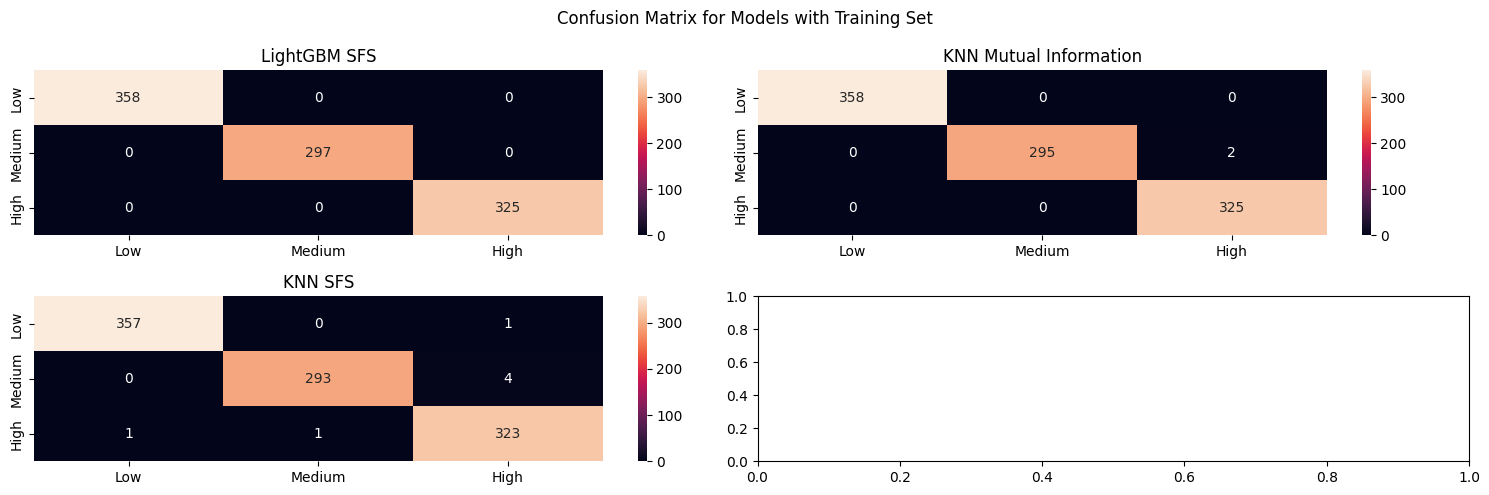

In [107]:
# Confusion matrix for the training models

models =['LightGBM SFS', 'KNN Mutual Information', 'KNN SFS']
labels=['Low','Medium','High']

fig,ax=plt.subplots(2,2,figsize=(15,5))
r=0
c=0
for i, model in enumerate(models):
    sns.heatmap(mc_t[i],annot=True,fmt='d',ax=ax[r][c],xticklabels=labels,yticklabels=labels)
    ax[r][c].set_title(model)
    c+=1
    if(c==2):
        r+=1
        c=0
plt.suptitle('Confusion Matrix for Models with Training Set')
plt.tight_layout()
plt.show()

**_Confusion Matrix for Test_** 

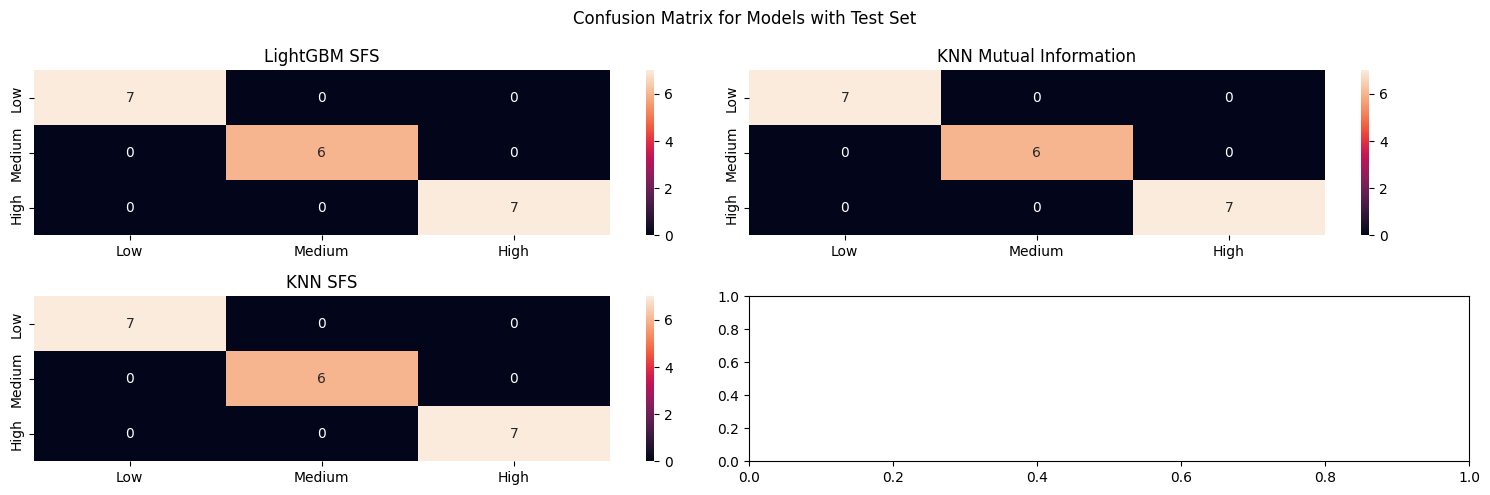

In [108]:
# matrices de confusion para los modelos de test

models =['LightGBM SFS', 'KNN Mutual Information', 'KNN SFS']
labels=['Low','Medium','High']

fig,ax=plt.subplots(2,2,figsize=(15,5))
r=0
c=0
for i, model in enumerate(models):
    sns.heatmap(mc[i],annot=True,fmt='d',ax=ax[r][c],xticklabels=labels,yticklabels=labels)
    ax[r][c].set_title(model)
    c+=1
    if(c==2):
        r+=1
        c=0
plt.suptitle('Confusion Matrix for Models with Test Set')
plt.tight_layout()
plt.show()

### Step 10: First Conclusions

Conclusions: Any of the three models, with their hyperparameters optimized or even unoptimized, yield very good results, but the two best would be LightGBM with SFS feature selection, followed by KNN Mutual Information.
Perhaps because it's less expensive across the board, I'd stick with KNN Mutual Information feature selection.

*Since I'm not satisfied with the project results, as everything is too perfect, I decide to investigate the dataset and its variables a little further.*

*After calmly reviewing the page where I got the data and other users' comments, I realize that the dataset appears to be synthetic. This explains why the metrics are so good and why other users have had similar results to mine.*

*Disappointed with my choice of dataset and the results obtained, I'm not going to give up and will contribute more information and evidence to this project.*

### Extra: Finding the minimum number of Features to get good metrics

Since everything is so perfect, and at the professor's suggestion, I decided to expand the project, trying to find the minimum number of features I could work with to obtain good metrics. My goal is to have an average recall of 0.70.

**_PCA_**

In [109]:
# I'm going to apply a PCA and see what happens

# It's neccesarry use scaled features, so...

pca = PCA() # instance

X_train_pca = X_train_scal
X_test_pca = X_test_scal

y_train_pca = train_set[target]
y_test_pca = test_set[target]

pca.fit(X_train_pca, y_train_pca) # fit model with PCA

PCA()

In [110]:
# Explanation of variance

pca.explained_variance_ratio_

array([0.39403328, 0.11834893, 0.08822447, 0.06552422, 0.05668537,
       0.05301996, 0.03456703, 0.02978727, 0.02661353, 0.02226066,
       0.02194124, 0.01809338, 0.01475345, 0.01229521, 0.00986061,
       0.00895621, 0.00680743, 0.0049377 , 0.00417781, 0.00368498,
       0.00292774, 0.001451  , 0.00104851])

------------------------------------------
Percentage of cumulative explained variance
------------------------------------------
[0.39403328 0.51238221 0.60060669 0.6661309  0.72281628 0.77583624
 0.81040326 0.84019053 0.86680406 0.88906472 0.91100596 0.92909934
 0.94385279 0.956148   0.96600861 0.97496483 0.98177226 0.98670996
 0.99088776 0.99457274 0.99750049 0.99895149 1.        ]


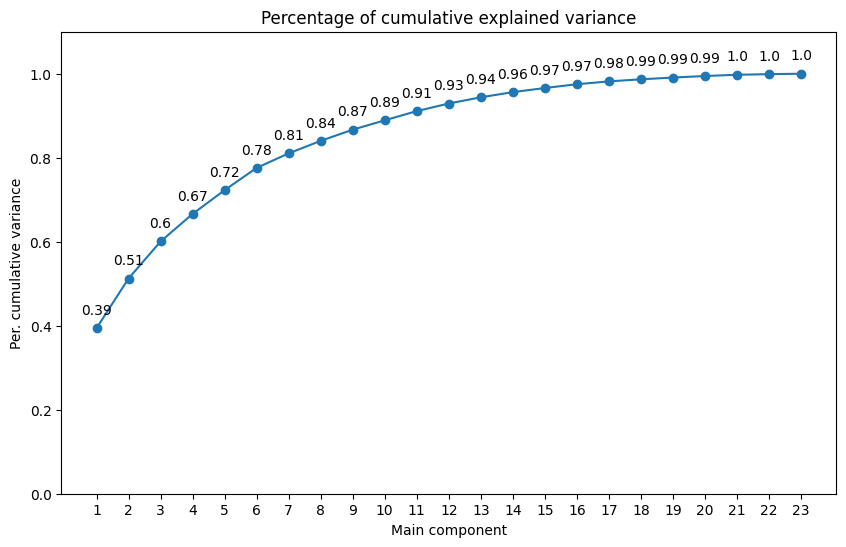

In [111]:
# Graphically

prop_variance_cum = pca.explained_variance_ratio_.cumsum()

print('------------------------------------------')
print('Percentage of cumulative explained variance')
print('------------------------------------------')
print(prop_variance_cum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
ax.plot(
    np.arange(len(X_train_scal.columns)) + 1,
    prop_variance_cum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X_train_scal.columns)) + 1, prop_variance_cum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Percentage of cumulative explained variance')
ax.set_xlabel('Main component')
ax.set_ylabel('Per. cumulative variance');

In [112]:
# According to this feature selector if I go below 4 features, the performance will not be as good. Even so, I've run some tests, and it seems that 4 still provides very good metrics overall.
# The metrics start to deteriorate when I use 2 features.

In [113]:
# Application to the models obtained previously

X_train_pca_2 = pca.transform(X_train_pca[features_list])
X_test_pca_2 = pca.transform(X_test_pca[features_list])

# First with LGBM SFS

lgb_clf_pca = LGBMClassifier(**lgb_grid.best_params_, verbose = -100)
lgb_clf_pca.fit(X_train_pca_2[:,:2], y_train) # use 2 features
y_pred = lgb_clf_pca.predict(X_test_pca_2[:,:2]) # use 2 features
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
         Low       1.00      1.00      1.00         6
      Medium       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



/Users/lauragarcia/.local/share/virtualenvs/lauragarcia-3NpKiQeF/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [114]:
# Now with KNN Mutual Information

Knn_mi_clf_pca = KNeighborsClassifier(**knn_optimized_mi.best_params_)
Knn_mi_clf_pca.fit(X_train_pca_2[:,:2], y_train) # use 2 features
y_pred = Knn_mi_clf_pca.predict(X_test_pca_2[:,:2]) # use 2 features
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
         Low       1.00      1.00      1.00         6
      Medium       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [115]:
# Finally with KNN SFS

nknn_clf_pca = KNeighborsClassifier(**knn_optimized.best_params_)
nknn_clf_pca.fit(X_train_pca_2[:,:2], y_train) # use 2 features
y_pred = Knn_mi_clf_pca.predict(X_test_pca_2[:,:2]) # use 2 features
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
         Low       1.00      1.00      1.00         6
      Medium       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



**_Variance Threshold Selector_**

In [116]:
# I do it another way

from sklearn.feature_selection import VarianceThreshold

variance_thres = 0.1 # I have tried 0.5-0.1 and a couple of features vary (also, no matter how much I lower it, I don't get less)

var_selector = VarianceThreshold(variance_thres)
var_selector.fit(X_train)
print("Selected list for Variance selector", var_selector.get_feature_names_out())

Selected list for Variance selector ['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Passive Smoker' 'Chest Pain'
 'Coughing of Blood' 'Fatigue' 'Weight Loss' 'Shortness of Breath'
 'Wheezing' 'Swallowing Difficulty' 'Clubbing of Finger Nails'
 'Frequent Cold' 'Dry Cough' 'Snoring']


In [117]:
# I put them in a variable

features_var = var_selector.get_feature_names_out()[:2] # I'm only left with the first two
features_var


array(['Age', 'Gender'], dtype=object)

In [118]:
# I try to pass them to the models
# First LGBM 

lgb_clf_var = LGBMClassifier(**lgb_grid.best_params_, verbose = -100)
lgb_clf_var.fit(X_train[features_var], y_train) 
y_pred = lgb_clf_var.predict(X_test[features_var]) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.86      0.86      0.86         7
         Low       0.83      0.83      0.83         6
      Medium       0.86      0.86      0.86         7

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



In [119]:
# Now with KNN ( Mutual Information)

Knn_mi_clf_var = KNeighborsClassifier(**knn_optimized_mi.best_params_)
Knn_mi_clf_var.fit(X_train[features_var], y_train) 
y_pred = Knn_mi_clf_var.predict(X_test[features_var])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.75      0.86      0.80         7
         Low       0.67      0.67      0.67         6
      Medium       0.83      0.71      0.77         7

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20



In [120]:
# Finally with KNN (SFS)

Knn_clf_var = KNeighborsClassifier(**knn_optimized.best_params_)
Knn_clf_var.fit(X_train[features_var], y_train) 
y_pred = Knn_clf_var.predict(X_test[features_var])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.75      0.86      0.80         7
         Low       0.67      0.67      0.67         6
      Medium       0.83      0.71      0.77         7

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20



In [121]:
# Interestingly, the two variables chosen with the variance threshold are gender and age, which were initially discarded in many of the previous selections.
# And yet, the metrics with those two variables alone are quite good.
# I'm increasingly convinced that this dataset is ready.

**_Selection of two Features_**

Having seen that the prediction models still perform quite well with two features, I'm going to select the first two features from each selection group and run the models again to see what happens.

In [122]:
# Selecting the first two features in each selector

features_stad_sel = features_stad[:2]
features_mi_sel = features_mi[:2]
features_manual_sel = features_manual[:2]
features_model_sel = features_model[:2]
features_RFE_sel = features_RFE[:2]
features_SFS_sel = features_SFS[:2]
features_hard_voting_sel = features_hard_voting[:2]

In [123]:
# I pass them through the model

In [124]:
# Let's start with general modeling.
# Here I'm going to ignore linear regression and SVC for scaling reasons. I'll follow a similar process with these two models later.

names = [f"Selection {name}" for name in ["stadistic", "mutual information", "manual", "model", "rfe", "sfs", "voting"]]
model_names = ["Random Forest", "KNN", " Decission Tree", "AdaBoost", "LightGBM", "Catboost"]

# We instantiate the different classification models that I am going to use.

rf_clf = RandomForestClassifier(class_weight= "balanced", random_state= 42)
knn_clf = KNeighborsClassifier(weights= "uniform", n_jobs= -1)
dt_clf = DecisionTreeClassifier(class_weight = "balanced", random_state = 42) 
ada_clf = AdaBoostClassifier(random_state = 42)
lgb_clf = LGBMClassifier(class_weight= "balanced", random_state = 42, verbose = -100, n_jobs= -1)
cb_clf = CatBoostClassifier(random_state = 42)


models = [rf_clf, knn_clf, dt_clf, ada_clf, lgb_clf, cb_clf] # listado de modelos
results = [] # List where we will store the metric results of each model with each group of features used

# We perform cross-validation testing

for index, checklist in enumerate([features_stad_sel, features_mi_sel, features_manual_sel, features_model_sel, features_RFE_sel, features_SFS_sel, features_hard_voting_sel]): # we pass the set of two features selected from each list of selected features
    X_train_models = train_set[checklist]
    y_train_models = y_train
    
    for model_name, modelo in zip(model_names, models):
        metric = np.mean(cross_val_score(modelo, X_train_models, y_train_models, cv = 5, scoring = "balanced_accuracy")) # we obtain the cross-valuation metric
        data = {
            "features_list": names[index],
            "model": model_name,
            "avg. recall": metric
        }
        print(data)
        results.append(data.copy())
df_results = pd.DataFrame(results) # pass the results to a dataframe
df_results.sort_values("avg. recall", ascending = False) # we order from best to worst metric

{'features_list': 'Selection stadistic', 'model': 'Random Forest', 'avg. recall': np.float64(0.8748674489352455)}
{'features_list': 'Selection stadistic', 'model': 'KNN', 'avg. recall': np.float64(0.8696248008112416)}
{'features_list': 'Selection stadistic', 'model': ' Decission Tree', 'avg. recall': np.float64(0.8748674489352455)}
{'features_list': 'Selection stadistic', 'model': 'AdaBoost', 'avg. recall': np.float64(0.8355053086397083)}
{'features_list': 'Selection stadistic', 'model': 'LightGBM', 'avg. recall': np.float64(0.879776908590468)}
Learning rate set to 0.078151
0:	learn: 1.0056689	total: 689us	remaining: 689ms
1:	learn: 0.9355756	total: 1.12ms	remaining: 560ms
2:	learn: 0.8830273	total: 1.59ms	remaining: 529ms
3:	learn: 0.8261472	total: 2.06ms	remaining: 514ms
4:	learn: 0.7775090	total: 2.52ms	remaining: 501ms
5:	learn: 0.7343048	total: 2.96ms	remaining: 490ms
6:	learn: 0.6997931	total: 3.42ms	remaining: 486ms
7:	learn: 0.6698004	total: 3.85ms	remaining: 478ms
8:	learn: 0.

features_list            model  avg. recall
6   Selection mutual information    Random Forest     0.935722
8   Selection mutual information   Decission Tree     0.935722
11  Selection mutual information         Catboost     0.935722
10  Selection mutual information         LightGBM     0.935722
7   Selection mutual information              KNN     0.923081
4            Selection stadistic         LightGBM     0.879777
40              Selection voting         LightGBM     0.879777
16              Selection manual         LightGBM     0.879777
2            Selection stadistic   Decission Tree     0.874867
0            Selection stadistic    Random Forest     0.874867
14              Selection manual   Decission Tree     0.874867
38              Selection voting   Decission Tree     0.874867
36              Selection voting    Random Forest     0.874867
12              Selection manual    Random Forest     0.874867
41              Selection voting         Catboost     0.874137
17              Selection manual         Catboost     0.874137
5            Selection stadistic         Catboost     0.874137
1            Selection stadistic              KNN     0.869625
13              Selection manual              KNN     0.869625
37              Selection voting              KNN     0.869625
39              Selection voting         AdaBoost     0.835505
3            Selection stadistic         AdaBoost     0.835505
15              Selection manual         AdaBoost     0.835505
22               Selection model         LightGBM     0.826651
20               Selection model   Decission Tree     0.821010
18               Selection model    Random Forest     0.821010
23               Selection model         Catboost     0.821010
19               Selection model              KNN     0.812325
26                 Selection rfe   Decission Tree     0.733874
24                 Selection rfe    Random Forest     0.733874
28                 Selection rfe         LightGBM     0.733874
29                 Selection rfe         Catboost     0.729650
27                 Selection rfe         AdaBoost     0.703844
25                 Selection rfe              KNN     0.698796
30                 Selection sfs    Random Forest     0.679418
32                 Selection sfs   Decission Tree     0.677742
34                 Selection sfs         LightGBM     0.672443
35                 Selection sfs         Catboost     0.665124
31                 Selection sfs              KNN     0.653226
21               Selection model         AdaBoost     0.646574
9   Selection mutual information         AdaBoost     0.635185
33                 Selection sfs         AdaBoost     0.479467

In [125]:
# Here we can already see that some of the models with some feature selection already fall below 0.70.
# In fact, the worst is Adaboost with SFS selection, which would have a score of 0.47.
# Still, the five best models are above 0.90, all of them with mutual information selection.

In [126]:
# As a curiosity, I am going to list the two mutual information variables that give the best results and those that give the worst results, which are the SFS selection.

print(f'The two features that give the best results are {' and '.join(features_mi_sel)}')

The two features that give the best results are Passive Smoker and Coughing of Blood


In [127]:
print(f'The two features that give the worst results are {' and '.join(features_SFS_sel)}')

The two features that give the worst results are Age and Gender


In [128]:
# I'm going to do crossvalidation with logistic regression and SVC

names = [f"Selection {nombre}" for nombre in ["stadistic", "mutual information", "manual", "model", "rfe", "sfs", "voting"]]
model_names_scaled = ["Logistic Regressor", "SVC"]

# We instantiate the models

lr_clf = LogisticRegression(class_weight= "balanced", random_state= 42)
SVC_clf = SVC (class_weight = "balanced", random_state = 42)

models_scaled = [lr_clf, SVC_clf]
results_scaled = [] # listado de resultados de la métrica de valoración cruzada

for index, checklist in enumerate([features_stad_sel, features_mi_sel, features_manual_sel, features_model_sel, features_RFE_sel, features_SFS_sel, features_hard_voting_sel]): # we pass the set of two features selected from each list of selected features
    X_train_modelos_2 = X_train_scal[checklist]
    y_train_modelos_2 = y_train
    
    for model_name_scaled, modelo in zip(model_names_scaled, models_scaled):
        metric = np.mean(cross_val_score(modelo, X_train_modelos_2, y_train_modelos_2, cv = 5, scoring = "balanced_accuracy")) # cross validation
        data = {
            "features_list": names[index],
            "model": model_name_scaled,
            "avg. recall": metric
        }
        print(data)
        results_scaled.append(data.copy())
df_resultados_scaled = pd.DataFrame(results_scaled)
df_resultados_scaled.sort_values("avg. recall", ascending = False) # we order from best to worst metric

{'features_list': 'Selection stadistic', 'model': 'Logistic Regressor', 'avg. recall': np.float64(0.7527980078063631)}
{'features_list': 'Selection stadistic', 'model': 'SVC', 'avg. recall': np.float64(0.8720846008981603)}
{'features_list': 'Selection mutual information', 'model': 'Logistic Regressor', 'avg. recall': np.float64(0.6622169037208426)}
{'features_list': 'Selection mutual information', 'model': 'SVC', 'avg. recall': np.float64(0.9225423728813558)}
{'features_list': 'Selection manual', 'model': 'Logistic Regressor', 'avg. recall': np.float64(0.7527980078063631)}
{'features_list': 'Selection manual', 'model': 'SVC', 'avg. recall': np.float64(0.8720846008981603)}
{'features_list': 'Selection model', 'model': 'Logistic Regressor', 'avg. recall': np.float64(0.6851037141774787)}
{'features_list': 'Selection model', 'model': 'SVC', 'avg. recall': np.float64(0.6893242068665798)}
{'features_list': 'Selection rfe', 'model': 'Logistic Regressor', 'avg. recall': np.float64(0.5952258968

features_list               model  avg. recall
3   Selection mutual information                 SVC     0.922542
1            Selection stadistic                 SVC     0.872085
5               Selection manual                 SVC     0.872085
13              Selection voting                 SVC     0.872085
4               Selection manual  Logistic Regressor     0.752798
0            Selection stadistic  Logistic Regressor     0.752798
12              Selection voting  Logistic Regressor     0.752798
9                  Selection rfe                 SVC     0.730626
7                Selection model                 SVC     0.689324
6                Selection model  Logistic Regressor     0.685104
2   Selection mutual information  Logistic Regressor     0.662217
8                  Selection rfe  Logistic Regressor     0.595226
11                 Selection sfs                 SVC     0.498287
10                 Selection sfs  Logistic Regressor     0.426731

In [129]:
# As with the other models, the metrics remain very good with mutual information selection. The worst metrics in both models are with SFS selection.

*After performing a minimal feature selection using the PCA technique, I found that even with just two features, the model metrics are still very high.* *Specifically, the top five metrics are above 0.92 using mutual information selection. These two features are Coughing of Blood and Passive Smoker.*
*It is also true that the AdaBoost model, along with the Logistic Regressor and SVC, perform the worst in combination with SFS selection. Their metrics are well below 0.7. These features are age and gender.*
*In this case, both variables are among the first to be discarded in most feature selection processes or are the least important. In fact, we already pointed this out in the visual analysis.*
*Even so, when I performed the variance analysis, these are the two variables that were selected based on the variance threshold, and the models selected as the best were able to obtain good metrics with them.*

### Final Conclusions ###

After all the tests performed and the results obtained, I can say that the dataset I selected is clearly a synthetic and prepared dataset. The metrics obtained from the models, even in the worst-case scenario, which would be incorrectly selecting the two features, or, to put it another way, the ones that visually bear the least relation to the target, our prediction models can still achieve very good metrics.
Although for me, reaching these conclusions has been a bit disappointing, since I intended the project to be a positive boost for my future career, I have drawn some interesting conclusions from the entire project.

### Personal Conclusions ###

Due to the aforementioned circumstances related to the dataset I chose, I decided to add this section of personal conclusions, which I believe are noteworthy and of some relevance.
Generally speaking, I must be more rigorous when choosing a dataset in order to conduct good research in *Machine Learning* and not just rely on reputable websites.
During the development of the project, I realized that using all the tools at our disposal for feature selection is very important. As I have seen, and the facts speak for themselves, if I had only relied on visual selection or variance threshold selection, I would have had very mixed results. As I mentioned above, for some selectors, the most important features are those that, a priori, seemed to us to be the least relevant. However, in the end, it turned out that these were the ones that gave the worst results when run through the models.
It's also important to have or choose a good set of models to run our tests with. This way, we'll have multiple options when combining them with the different feature selections, allowing us to choose the models we consider best. In fact, we shouldn't just choose them because they provide the best metrics, but also because, all else being equal, they are less expensive to launch or maintain.
Hyperparameter optimization also helps us choose the ideal model and achieve fantastic metrics.
Last but not least, I think the problem with this dataset may be the standardization of feature values.
In the fields of medicine or biology, things aren't black and white; there are always nuances, and I think that's the problem. I'm going to assume that there really is data behind each of the values ​​for the symptoms or specific conditions of each patient. I think the problem lies in the way they've been compacted or categorized. I say this because I haven't found any standards anywhere for categorizing chest pain, or a dry cough, or smoking. In fact, in most cases, these considerations are based on three or four categories, such as massive (mild, moderate, severe). Although in some specific cases, such as alcoholism or smoking, there seem to be more established guidelines, such as the number of alcoholic drinks you consume daily or the number of cigarettes you smoke, the rest are very open to interpretation. It even strikes me that the degree of obesity of patients is categorized into seven levels, when in reality, the WHO only considers five degrees of obesity as such. Perhaps it's just a misinterpretation because it includes the categories of underweight and normal weight, but we'd be back to square one. We're missing information about the categorization of the variables.

Despite everything, I'm taking with me all the learning I've gained from doing this job, both in terms of personal knowledge of the medical field and the application of Machine Learning in medicine, since I believe it's the future of our health and our society.